In this notebook we will use the nn class **Sequential** to model a CNN

We will use the single target network

# Import

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import KFold

from tqdm import tqdm

import load_script
from params import *
from custom_layers import *
from training import *

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading the dataset

In [53]:
train_dataset,train_target=load_script.load_dataset_1000hz(train=True)

In [34]:
test_dataset,test_target=load_script.load_dataset_1000hz(train=False)

In [6]:
train_dataset,train_target=load_script.load_dataset(train=True)

In [54]:
test_dataset,test_target=load_script.load_dataset(train=False)

# Normalization

In [56]:
train_dataset.shape

torch.Size([3160, 28, 50])

In [63]:
test_dataset.shape

torch.Size([100, 28, 50])

In [57]:
mean=train_dataset.mean(0).view(1,28,50)
std=train_dataset.std(0).view(1,28,50)

In [58]:
train_dataset=(train_dataset-mean)/std
test_dataset=(test_dataset-mean)/std

# Defining the network

### Simple Network

In [59]:
class ThreeLayers(nn.Module):
    
    num_my_conv_layers=3
    num_linear_layers=2
    
    def __init__(self,params):
        super(ThreeLayers,self).__init__()
        
        self.params=params
        
        layers=[]
        for i in range(self.num_my_conv_layers): 
            layers+=MyConv1D(*self.params[i]).layers
        
        layers.append(Flatten())
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers]))
        layers.append(nn.ReLU())
        
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers+1]))
        
        self.sequential=nn.Sequential(*layers)
        
    def forward(self,x):
        x=self.sequential(x)
        
        return x

# Training


  0%|          | 0/100 [00:00<?, ?it/s]

28
Repetition 0
torch.Size([3160, 28, 50])

    0
    1
    3
  ⋮  
 3153
 3155
 3158
[torch.LongTensor of size 1580]
 
    2
    4
    6
  ⋮  
 3156
 3157
 3159
[torch.LongTensor of size 1580]




  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([3160, 28, 50])

    2
    4
    6
  ⋮  
 3156
 3157
 3159
[torch.LongTensor of size 1580]
 
    0
    1
    3
  ⋮  
 3153
 3155
 3158
[torch.LongTensor of size 1580]



100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


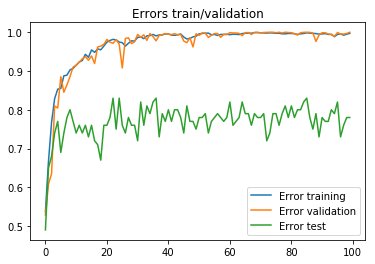

  0%|          | 0/100 [00:00<?, ?it/s]

Repetition 1
torch.Size([3160, 28, 50])

    0
    5
    6
  ⋮  
 3156
 3157
 3158
[torch.LongTensor of size 1580]
 
    1
    2
    3
  ⋮  
 3154
 3155
 3159
[torch.LongTensor of size 1580]



  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([3160, 28, 50])

    1
    2
    3
  ⋮  
 3154
 3155
 3159
[torch.LongTensor of size 1580]
 
    0
    5
    6
  ⋮  
 3156
 3157
 3158
[torch.LongTensor of size 1580]



 25%|██▌       | 25/100 [00:22<01:07,  1.12it/s]

KeyboardInterrupt: 

In [67]:
cv=CrossValidation(k=2,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)

net_type=ThreeLayers
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(linear_filters=[200,2],dropout_rate=0)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100,mini_batch_size=79)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

cv(params)


  0%|          | 0/100 [00:00<?, ?it/s]

28
Repetition 0



100%|██████████| 100/100 [01:27<00:00,  1.14it/s]

Performance: nan



/Users/savare/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/savare/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


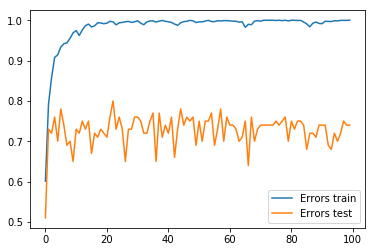

  0%|          | 0/100 [00:00<?, ?it/s]

Repetition 1


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]

Performance: nan


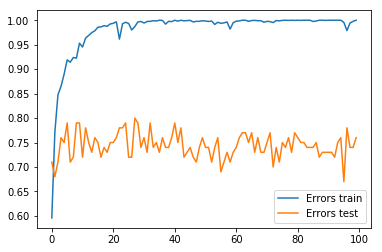

  0%|          | 0/100 [00:00<?, ?it/s]

Repetition 2


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]

Performance: nan


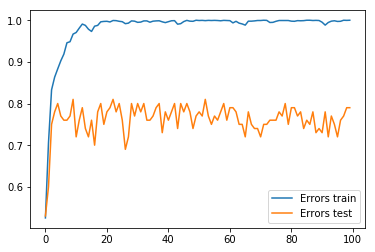

  0%|          | 0/100 [00:00<?, ?it/s]

Repetition 3


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]

Performance: nan


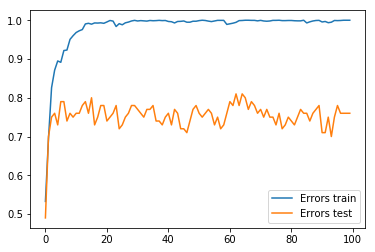

  0%|          | 0/100 [00:00<?, ?it/s]

Repetition 4


100%|██████████| 100/100 [01:27<00:00,  1.15it/s]

Performance: nan


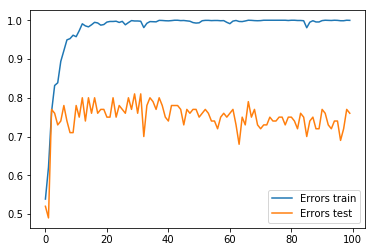

([99, 99, 99, 99, 99],
 [0.80000000000000004,
  0.80000000000000004,
  0.81000000000000005,
  0.81000000000000005,
  0.81000000000000005],
 [nan, nan, nan, nan, nan])

In [68]:
net_type=ThreeLayers
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(linear_filters=[200,2],dropout_rate=0)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

train=Train(train_dataset=train_dataset,test_dataset=test_dataset,
            train_target=train_target,test_target=test_target)
train(params)